<a href="https://colab.research.google.com/github/koegode/Hackathon202203-Project-3/blob/main/AMT_VADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import re
import string
import nltk
import csv
import demoji
# demoji.download_codes()
from nltk.stem.wordnet import WordNetLemmatizer

# df = pd.read_json ('tweets.jsonl', lines = True)
# df.to_csv ('tweets.csv')

In [ ]:
flood_amt_df = pd.read_csv ('amt_dataset.csv')
flood_amt_df.shape

(2001, 31)

In [ ]:
import json
import collections
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
from nltk.tokenize import TweetTokenizer
def text_preprocess(text):
    FLAGS = re.MULTILINE | re.DOTALL
    # Different regex parts for smiley faces
    eyes = r"[8:=;]"
    nose = r"['`\-]?"
    # function so code less repetitive
    def re_sub(pattern, repl):
        return re.sub(pattern, repl, text, flags=FLAGS)
    text = re_sub(r"https?:\/\/\S+\b|www\.(\w+\.)+\S*", "<url>")
    text = re_sub(r"/"," / ")
    text = re_sub(r"@\w+", "<user>")
    text = re_sub(r"{}{}[)dD]+|[)dD]+{}{}".format(eyes, nose, nose, eyes), "<smile>")
    text = re_sub(r"{}{}p+".format(eyes, nose), "<lolface>")
    text = re_sub(r"{}{}\(+|\)+{}{}".format(eyes, nose, nose, eyes), "<sadface>")
    text = re_sub(r"{}{}[\/|l*]".format(eyes, nose), "<neutralface>")
    text = re_sub(r"<3","<heart>")
    text = re_sub(r"[-+]?[.\d]*[\d]+[:,.\d]*", "<number>")
    text = re_sub(r"([!?.]){2,}", r"\1 <repeat>")
    text = re_sub(r"\b(\S*?)(.)\2{2,}\b", r"\1\2 <elong>")
    text = re_sub(r"[A-Za-z]+[@#$%^&*()]+[A-Za-z]*","abuse")
    
    return  text #" ".join(tokens)


In [ ]:
flood_amt_df.head()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
for text in flood_amt_df['Input.text']:
    vs = analyzer.polarity_scores(text)
    print("{:-<65} {}".format(text, str(vs)))

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [ ]:
flood_amt_df['cleaned_text'] = flood_amt_df['Input.text'].apply(text_preprocess)


In [ ]:
analyzer = SentimentIntensityAnalyzer()
flood_amt_df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in flood_amt_df['Input.text']]
flood_amt_df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in flood_amt_df['Input.text']]
flood_amt_df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in flood_amt_df['Input.text']]
flood_amt_df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in flood_amt_df['Input.text']]

In [ ]:
flood_amt_df['scores'] = flood_amt_df['Input.text'].apply(lambda text: sid.polarity_scores(text))
flood_amt_df['sentiment_score'] = flood_amt_df['compound'].apply(lambda c: 'positive' if c >= 0 else 'negative')
flood_amt_df['sentiment_score2'] = flood_amt_df['compound'].apply(lambda c: 'positive' if c > 0 else ('neutral' if c == 0 else 'negative'))

flood_amt_df.head()

In [ ]:
flood_amt_df['Answer.sentiment.label'].unique()

In [ ]:
flood_amt_df.columns

In [ ]:
sent_score = []

for comp in flood_amt_df['compound']:
    if comp > 0:
        sent_score.append('pos')
    elif comp == 0:
        sent_score.append('neu')
    else:
        sent_score.append('neg')
    
flood_amt_df['sent_score']  = sent_score



label_1 = []
sentiment_score_1 =[]

for index, row in flood_amt_df.iterrows():
    if (row['Answer.sentiment.label'] == 'Positive') | (row['Answer.sentiment.label'] == 'Slightly positive'):
        label_1.append(1)
    elif row['Answer.sentiment.label'] == 'Neutral':
        label_1.append(0)
    else:
        label_1.append(-1)
        
    if row['sentiment_score2'] == 'positive':
        sentiment_score_1.append(1)
    elif row['sentiment_score2'] == 'neutral':
        sentiment_score_1.append(0)
    else:
        sentiment_score_1.append(-1)
    
flood_amt_df['label_1']  = label_1
flood_amt_df['sentiment_score_1']  = sentiment_score_1

In [ ]:
sent_score_comp = []

for index, row in flood_amt_df.iterrows():
    if row['label_1'] == row['sentiment_score_1']:
        sent_score_comp.append('same')
    else:
        sent_score_comp.append('different')
    
flood_amt_df['sent_score_comp']  = sent_score_comp


In [ ]:
flood_amt_df.columns

In [ ]:
flood_amt_df.head()

In [ ]:
flood_amt_df = flood_amt_df[['Input.text', 'cleaned_text', 'Answer.sentiment.label', 'sentiment_score', 'scores', 'sent_score', 'sent_score_comp','label_1',
       'sentiment_score_1']]
flood_amt_df.head()

<AxesSubplot:title={'center':'Flood - AMT Sentiment Analysis - Hackathon'}>

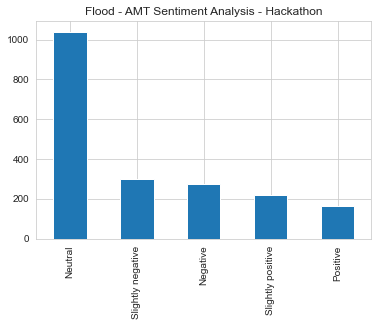

In [ ]:
flood_amt_df['Answer.sentiment.label'].value_counts().plot(kind='bar',title="Flood - AMT Sentiment Analysis - Hackathon")

<AxesSubplot:title={'center':'Flood - AMT Sentiment Analysis - VADER'}>

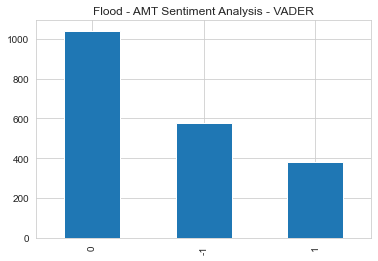

In [ ]:
flood_amt_df['label_1'].value_counts().plot(kind='bar',title="Flood - AMT Sentiment Analysis - VADER")

<AxesSubplot:title={'center':'Flood - AMT Sentiment Analysis 2 - VADER'}>

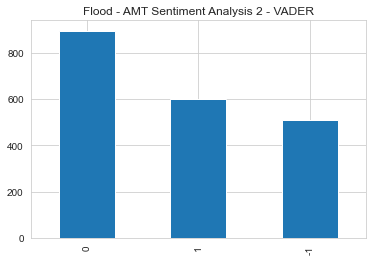

In [ ]:
flood_amt_df['sentiment_score_1'].value_counts().plot(kind='bar',title="Flood - AMT Sentiment Analysis 2 - VADER")

In [ ]:
grouped_multiple

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_actu = flood_amt_df['label_1']
y_pred = flood_amt_df['sentiment_score_1']
confusion_matrix(y_actu, y_pred)


array([[266, 193, 119],
       [188, 592, 260],
       [ 54, 110, 219]], dtype=int64)

In [ ]:
diff_flood_amt_df = flood_amt_df[flood_amt_df['sent_score_comp'] == 'different']
print(f'Total number of disimilar sentiment: {len(diff_flood_amt_df)}')
diff_flood_amt_df

In [ ]:
flood_amt_df.to_csv(r'C:/Temp/flood_amt_labelled.csv')  